In [1]:
from preprocessing import preprocess
from train import train_model
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import torch
import joblib
import matplotlib.pyplot as plt

df = pd.read_csv("../data/Activities-6-2-2.csv")
X_train, X_test, y_train, y_test = preprocess(df)
model, mse, losses = train_model(X_train, y_train, X_test, y_test)

print("MSE:", mse)

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Distance        -0.028017
Body Battery    -0.153053
Sleep           -0.545508
stress           0.292995
Total Ascent     0.163639
Total Descent    0.155161
Temperature     -0.434121
Avg Pace         1.000000
Name: Avg Pace, dtype: float64
Distance         0.012222
Body Battery    -0.170837
Sleep           -0.553652
stress           0.357669
Total Ascent     0.162626
Total Descent    0.171516
Temperature     -0.438218
Avg Pace         1.000000
Name: Avg Pace, dtype: float64
torch.Size([289, 7]) torch.Size([289, 1]) torch.Size([51, 7]) torch.Size([51, 1])
Loss: 0.1083
Loss: 0.0208
MSE: 0.7988
Loss: 0.0369
Loss: 0.0449
MSE: 0.0924
Loss: 0.0187
Loss: 0.0676
MSE: 0.0378
Loss: 0.0238
Loss: 0.0376
MSE: 0.0360
Loss: 0.0267
Loss: 0.0226
MSE: 0.0276
Loss: 0.0293
Loss: 0.0101
MSE: 0.0188
Loss: 0.0276
Loss: 0.0060
MSE: 0.0163
Loss: 0.0270
Loss: 0.0027
MSE: 0.0147
Loss: 0.0229
Loss: 0.0023
MSE: 0.0132
Loss: 0.0181
Loss: 0.0012
MSE: 0.0165
MSE: 0.016484367770531475


Text(0.5, 1.0, 'Training Loss')

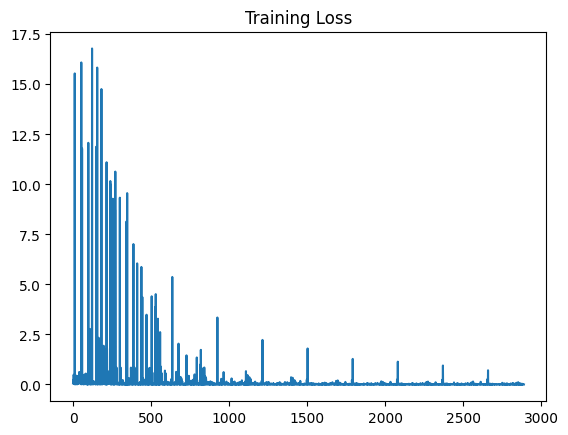

In [2]:
plt.plot(losses)
plt.title("Training Loss")

In [23]:
model.eval()

# Prepare new input
X_new = np.array([[5, 30, 470, 30, 100, 100, 30]])
scaler_X = joblib.load("scaler_X.save")
scaler_y = joblib.load("scaler_y.save")

X_new_scaled = scaler_X.transform(X_new)
X_new_tensor = torch.tensor(X_new_scaled, dtype=torch.float32)

# Predict
with torch.no_grad():
    y_pred = model(X_new_tensor).numpy().flatten()
    y_new = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).ravel()

print("Predicted:", y_new)

Predicted: [338.17465]


In [7]:
from map import geocode_address
from geopy.geocoders import Nominatim

lon, lat = geocode_address("Bischofstraße 15, Aachen, Germany")

In [8]:
from dotenv import load_dotenv
import os

load_dotenv()  # load .env file

ORS_API_KEY = os.environ["ORS_API_KEY"]
print(ORS_API_KEY)

eyJvcmciOiI1YjNjZTM1OTc4NTExMTAwMDFjZjYyNDgiLCJpZCI6IjEzNWMxYTFkMTA1YjRmMTM4NjVlNzM3OTZhOGQwMTgyIiwiaCI6Im11cm11cjY0In0=


In [10]:
from map import route_plan

coordinates, m = route_plan(ORS_API_KEY, lon, lat, 6)
m

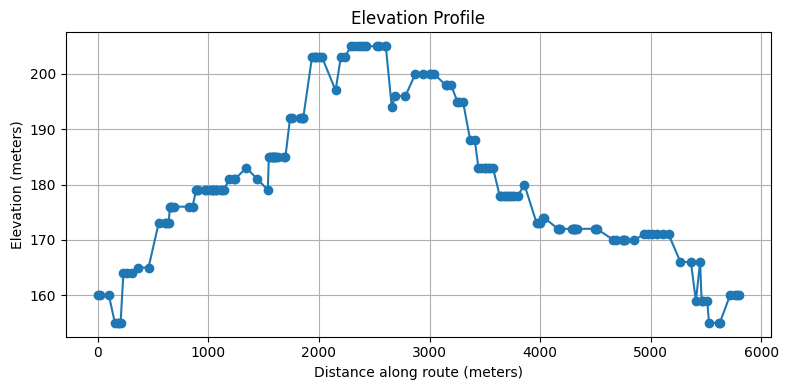

In [11]:
from map import elevation
import matplotlib.pyplot as plt

elevations, distances = elevation(coordinates)
# Plot
plt.figure(figsize=(8, 4))
plt.plot(distances, elevations, marker="o")
plt.xlabel("Distance along route (meters)")
plt.ylabel("Elevation (meters)")
plt.title("Elevation Profile")
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
from map import des_asc

total_ascent, total_descent = des_asc(elevations)
print("Total ascent:", total_ascent)
print("Total descent:", total_descent)

Total ascent: 82.0
Total descent: 82.0
